<a href="https://colab.research.google.com/github/Tomer87/Naya_Classification_Project/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General info

###What is Stroke ?

It happens when the brain's blood vessels become narrowed or blocked, causing severely reduced blood flow.

Blocked or narrowed blood vessels are caused by fatty deposits that build up in blood vessels or by blood clots or other debris that travel through your bloodstream and lodge in the blood vessels in your brain.

1.  id: unique identifier
2.  gender: "Male", "Female" or "Other"
3.  age: age of the patient
4.  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5.  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.  ever_married: "No" or "Yes"
7.  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8.  Residence_type: "Rural" or "Urban"
9.  avg_glucose_level: average glucose level in blood
10.  bmi: body mass index
11.  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12.  stroke: 1 if the patient had a stroke or 0 if not

**Data** : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

עבודות לדוגמא:
https://www.kaggle.com/ahmedterry/stroke-prediction-eda-classification-models

https://www.kaggle.com/siddheshera/stroke-eda-smote-9-models-90-accuracy#Encoding-


#Problem Definition


#Libaries

In [25]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#general tools
import numpy as np
import pandas as pd
import scipy as sp

#SKL
from sklearn.preprocessing import LabelEncoder

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import LabelEncoder


# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [3]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1pPNDUrxfKVM1pmtBmlJ91LsdVbR_fUD5/view?usp=sharing')
data = pd.read_csv(path)
BU=data.copy(deep = True) 
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

#Data Exploration & Pre Processing
Present data. Explain why it was presented in the manner chosen.
For example, Use Histograms / Violin Plots to present data which is statistical and infer its Dynamic Range, Spread, Histogram of Distances, etc...
Make some conclusion on the data based on the visual information.
For example, look at the corr() plot and say something about the linear relationship between different features.
Try estimating the difficulty of achieving the target score


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#put average value for null BMI
bmi_mean = data['bmi'].mean()
data['bmi'].fillna(value=bmi_mean, inplace=True)
print('bmi_mean:', bmi_mean)

#check nulls:
print('num of nulls:')
print(data.isnull().sum().sum(),'\n')

#
data=data[~(data.gender=='Other')]

#check Duplicates:
print('max of row appearence')
data.id.value_counts().max()

bmi_mean: 28.893236911794673
num of nulls:
0 

max of row appearence


1

In [8]:
# אפשר להוריד את עמודת ID
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


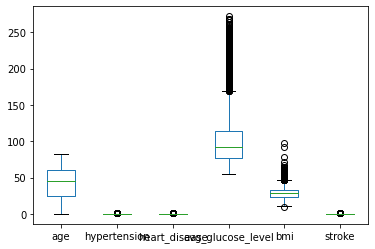

In [10]:
data.plot(kind='box')
plt.show()

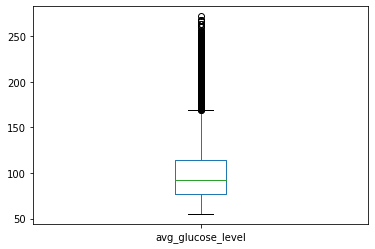

In [11]:
data.avg_glucose_level.plot(kind='box')
plt.show()

עומד על כ 25% מהדאטה ולכן לא נמחק

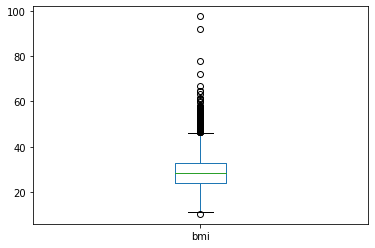

In [12]:
data.bmi.plot(kind='box')
plt.show()

רצוי למחוק את 4-5 האוט-ליירים

In [13]:
data.bmi.sort_values()

1609    10.3
3307    11.3
2187    11.5
657     12.0
922     12.3
        ... 
1559    66.8
544     71.9
928     78.0
4209    92.0
2128    97.6
Name: bmi, Length: 5109, dtype: float64

In [14]:
print(data.iloc[[1559, 544, 928, 4209, 2128]])

      gender   age  hypertension  ...   bmi smoking_status stroke
1559  Female  53.0             0  ...  66.8        Unknown      0
544     Male  42.0             0  ...  71.9   never smoked      0
928   Female  23.0             1  ...  78.0         smokes      0
4210  Female  15.0             0  ...  38.0   never smoked      0
2128    Male  17.0             1  ...  97.6        Unknown      0

[5 rows x 11 columns]


In [15]:
data = data.drop(1559)
data = data.drop(544)
data = data.drop(928)
data = data.drop(4209)
data = data.drop(2128)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


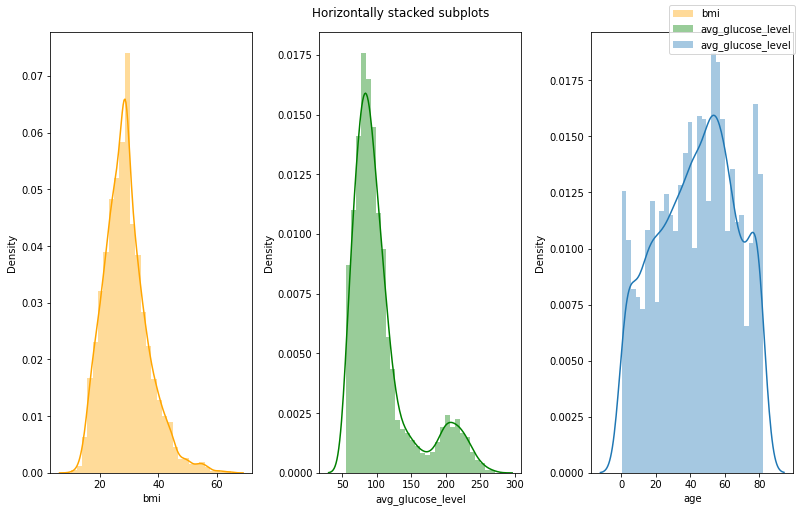

In [16]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
sns.distplot(data.bmi, color="orange", label="bmi", kde= True,ax=axes[0], bins=30,)
sns.distplot(data.avg_glucose_level, color="green", label="avg_glucose_level", kde= True,ax=axes[1],bins=30)
sns.distplot(data.age, label="avg_glucose_level", kde= True,ax=axes[2],bins=30)
fig.suptitle('Horizontally stacked subplots')
fig.legend();


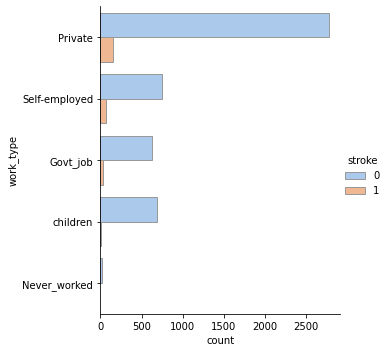

In [ ]:
#Work Type
sns.catplot(y="work_type", hue="stroke", kind="count",palette="pastel", edgecolor=".6",data=data);

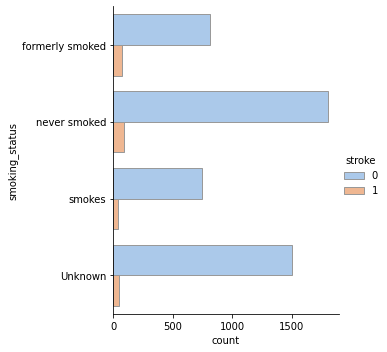

In [ ]:
##SMOKING status
sns.catplot(y="smoking_status", hue="stroke", kind="count",palette="pastel", edgecolor=".6",data=data)

In [ ]:
📌 1. In term of proportion private and self-employed have the similar amount of people having a stroke. However people from the gouvernment are more likely to not have a stroke compared to both first gategories moreover chlidren are not very likekly to get a stroke. Maybe that could be explain due to the degree of pressure felt by workers

📌 2. Surprisingly, it seems that the stroke is not highly corralated to smokers since the proportion of person having a stroke is fairly the same among the different smoking status.

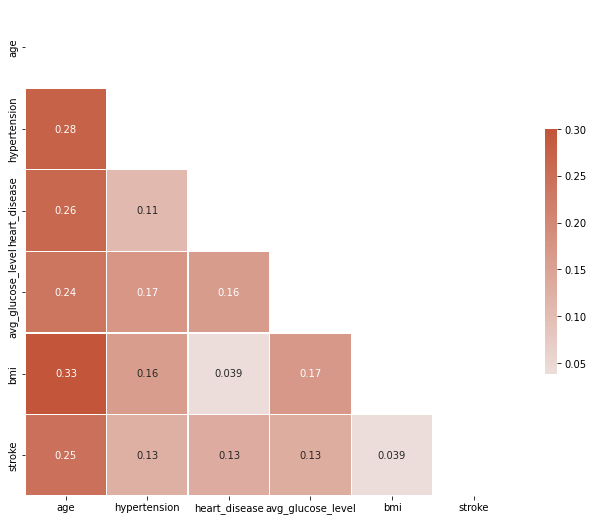

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
cat_df = data[['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary


stroke                             0    1
gender         Female           2851  141
               Male             2004  108
hypertension   0                4426  183
               1                 429   66
heart_disease  0                4626  202
               1                 229   47
ever_married   No               1725   29
               Yes              3130  220
work_type      Govt_job          624   33
               Never_worked       22    0
               Private          2770  149
               Self-employed     754   65
               children          685    2
Residence_type Rural            2395  114
               Urban            2460  135
smoking_status Unknown          1495   47
               formerly smoked   814   70
               never smoked     1800   90
               smokes            746   42

In [ ]:
# tאחוזי מקבלי השבץ מכלל האוכלוסיה הספציפית
s=data.work_type.value_counts()
p=data.groupby(['work_type']).sum('stroke')['stroke'] 
p/s

Govt_job         0.050228
Never_worked     0.000000
Private          0.050958
Self-employed    0.079365
children         0.002911
dtype: float64

לשקול להורד למטה

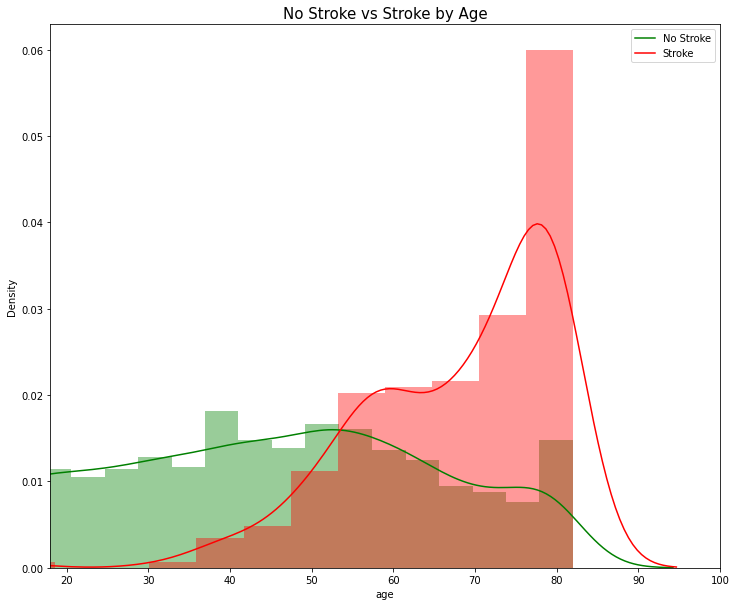

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.legend(['No Stroke','Stroke'])
plt.xlim([18,100])
plt.show();

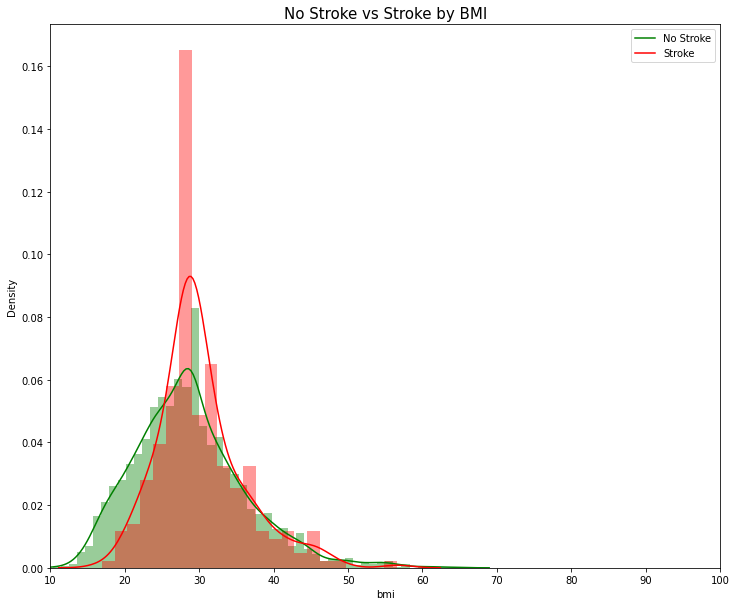

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.legend(['No Stroke','Stroke'])
plt.xlim([10,100])
plt.show()

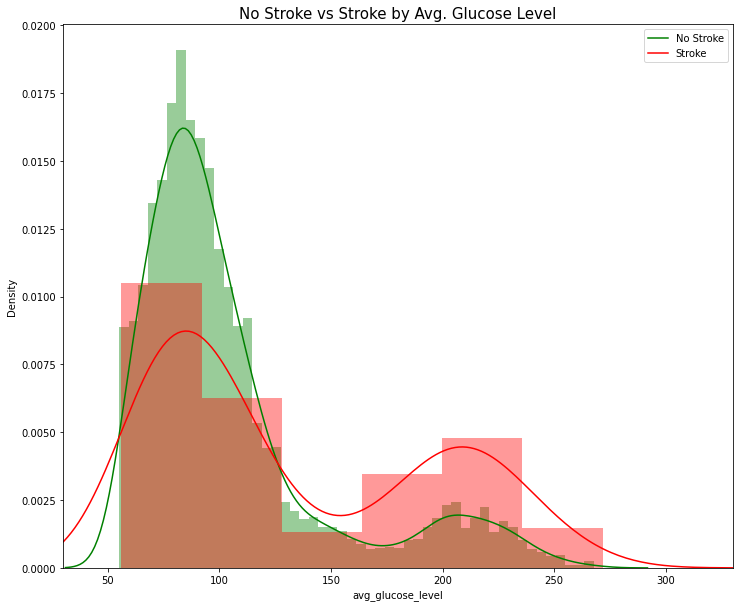

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
# plt.suptitle('No Stroke - green, Stroke - Red ')
plt.legend(['No Stroke','Stroke'])
plt.show()

#Data Pre Processing
Handle missing data. Explain the method used (Removal, replacement, etc…).
Remove outliers. Explain the model used to infer an outlier.


In [17]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)
data=data[~(data.gender=='Other')]


In [18]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


0    4855
1     249
Name: stroke, dtype: int64


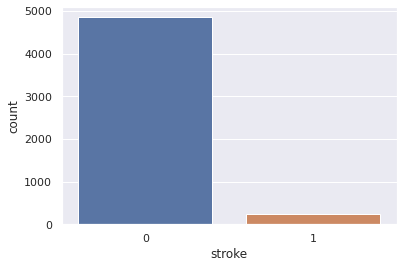

In [ ]:
print(data.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="stroke")
plt.show();

##Encoding

In [19]:
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
data["gender"] = data["gender"].apply(lambda x: 1 if x=="Male" else 0)


 
data = pd.get_dummies(data=data, columns=['smoking_status'])
data = pd.get_dummies(data=data, columns=['work_type'])

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0


הדאתא שלנו לא מאוזן, צריך להשתמש  בשיטה מתאימה
class_weight in logistic regression
stratify=(in the split to train and test)


In [ ]:
# sns.pairplot(data=BU, hue='stroke')

In [ ]:
# ax=data[data.stroke !=1].plot.scatter(x='gender', y='bmi', c="k", s=0.5,alpha=0.5,figsize=(20,10)) #ax זה הצירים
# data[data.stroke ==1].plot.scatter(x='gender', y='bmi', c="r", s=5,alpha=0.5, ax=ax) #ax argument allowed us to compare the axix of two charts #את הצבע נשים באדם
# ax.set_aspect(0.01)

In [20]:
# labale & feature seperation
X = data.drop(columns='stroke')     
y= data['stroke']

#split train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=data.stroke, random_state=1234)


האם כדאי לבצע נורמליזציה?

In [ ]:
# from sklearn.preprocessing import StandardScaler 
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

לדעתי רצוי לעשות אובר-סמפלינג

In [ ]:
# from imblearn.over_sampling import SMOTE


# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 174
Before OverSampling, counts of label '0': 3398 

After OverSampling, the shape of train_X: (6796, 17)
After OverSampling, the shape of train_y: (6796,) 

After OverSampling, counts of label '1': 3398
After OverSampling, counts of label '0': 3398


#Feature Engineering
If data requires, build new features from existing features. Analyze their contribution.
Do estimation about feature importance. Choose the features relevant to the task.


הורדנו את ה ID

#Models
Choose the methods which are applicable to your problem. Explain your choices.
Build the testing environment. Explain the choices made (About the size of the test set, which type of cross validation, Grid search, etc…).
Apply the chosen method. Compare the scoring. Try different scoring and explain results. Use cross validation to search for optimal hyper parameters.
Try a method you excluded on (a). Compare it to the results. Was it a good decision to exclude it?
Go back to step (2) and use the insight gained.


In [ ]:
# Model Selection


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])


lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[1080  377]
 [  17   58]]
Accuracy Score:  0.7428198433420365

K-Fold Validation Mean Accuracy: 78.61 %

Standard Deviation: 1.05 %

ROC AUC Score: 0.76

Precision: 0.13

Recall: 0.77

F1: 0.23
-----------------------------------

SVM :
[[1197  260]
 [  39   36]]
Accuracy Score:  0.8048302872062664

K-Fold Validation Mean Accuracy: 89.38 %

Standard Deviation: 1.35 %

ROC AUC Score: 0.65

Precision: 0.12

Recall: 0.48

F1: 0.19
-----------------------------------

Random Forest :
[[1392   65]
 [  66    9]]
Accuracy Score:  0.914490861618799

K-Fold Validation Mean Accuracy: 95.90 %

Standard Deviation: 2.43 %

ROC AUC Score: 0.54

Precision: 0.12

Recall: 0.12

F1: 0.12
-----------------------------------



In [ ]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,Random Forest,91.449086,95.895045,2.432614,0.537694,0.121622,0.120000,0.120805
1,SVM,80.483029,89.376354,1.352375,0.650776,0.121622,0.480000,0.194070
0,Logistic Regreesion,74.281984,78.605150,1.049458,0.757291,0.133333,0.773333,0.227451


##Logistic Regression

###Feature selection

נסיון להבין אם זה יעזור במקרה שעשינו דאמיז ויש לנו הרבה עמודות ולכן מקבלים ERROR

In [ ]:
#<! Royi: This is a way to have a summary of all methods
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

numFeatures   = 5
vMethods      = [chi2, f_classif, mutual_info_classif,f_classif]
vMethodsSring = ['Chi 2', 'ANOVA F Value', 'Mutual Informatiom','f_classif']

mMutualSelection = np.zeros((len(vMethods), X_train.shape[1]), dtype=bool)

for ii, iMethod in enumerate(vMethods):
  mMutualSelection[ii, :] = SelectKBest(score_func = iMethod, k = numFeatures).fit(X_train, y_train).get_support()

dfMutualSelection = pd.DataFrame(data = mMutualSelection, index = vMethodsSring, columns = X_train.columns, copy = True)
dfMutualSelection.index.name = 'Method'

dfMutualSelection

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
Method,,,,,,,,,,,,,,,,,
Chi 2,False,True,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False
ANOVA F Value,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False
Mutual Informatiom,False,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False
f_classif,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
# שימוש בפיצ'רים החשובים ביותר לפי השיטות חישוב השונות
X_train= X_train[['age','hypertension','heart_disease','avg_glucose_level']]
X_test= X_test[['age','hypertension','heart_disease','avg_glucose_level']]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data_LR = LogisticRegression()
F=data_LR.fit(X_train, y_train)


score = data_LR.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = data_LR.score(X_train, y_train)
logistic_test = data_LR.score(X_test, y_test)
#== 
y_pred= data_LR.predict(X_test) #########predict proba
print(classification_report(y_test, y_pred))

Testing Score 
 0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://stats.stackexchange.com/questions/384833/adjusting-probability-threshold-for-sklearns-logistic-regression-model

In [ ]:
treshold=0.5
data_LR.predict_proba(X_test)[:,1]>treshold

array([False, False, False, ..., False, False, False])

In [ ]:
#Asess the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=data_LR.predict_proba(X_test)[:,1]>treshold)
pd.DataFrame(cm, index=data_LR.classes_, columns=data_LR.classes_)

,0,1
0,1187,271
1,26,49


In [ ]:
# הפרמטרים שהמודל השתמש, שנדע בשביל גריד...
data_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

RandomizedSearchCV - הרצה רנדומלית של ערכים כשעושים גריד
GridSearchCV()- 

Cros Validation

**דרך נוספת**

StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit  # מגריל כמה פעמים חלוקה לטריין וטסט בגודל 75 אחוז
my_cv = StratifiedShuffleSplit(n_splits = 5, train_size = 0.75, random_state = 1234) #<! See https://scikit-learn.org/stable/modules/classes.html#splitter-classes


In [ ]:
from sklearn.model_selection import cross_val_score
-cross_val_score(F, X_train, y_train, cv=my_cv, scoring='neg_log_loss') #<! Make sure there at least n_splits of each lable by y_train.val_counts()


array([0.15923744, 0.15371908, 0.17366238, 0.15621172, 0.15606707])

Grid Search & Cross Validation

In [ ]:
my_param_grid = {'C': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3], 'penalty': ['l1', 'l2', 'elasticnet']}
#<! my_cv -> n_splits = 5
lr_model = GridSearchCV(estimator=LogisticRegression(max_iter=10), param_grid=my_param_grid, scoring='neg_log_loss', cv=my_cv)

In [ ]:
from time import time
t1 = time()
lr_model.fit(X_train, y_train)
t2 = time()
print(f"It took {t2-t1:.2f} seconds")

It took 0.69 seconds


In [ ]:
-lr_model.best_score_

0.25849503176770633

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, lr_model.predict_proba(X_test)) #<! Pay attention, for log loss we use predict probability and not predict

0.25911280689699645

In [ ]:
lr_model.best_params_


{'C': 5e-05, 'penalty': 'l2'}

אחרי שמצאנו את הערכים של הפרמטרים הכי טובים אפשר לעשות גריד על ערכים באיזור אלה שקיבלנו

##SVM

### SVM - Basic Classifier

In [21]:
# Simple SVC classifier only:

# Defining the SVC classifier:
clf_svc = SVC(random_state=0)
clf_svc.fit(X_train, y_train)

#Score  
svc_score = clf_svc.score(X_train, y_train)
svc_test = clf_svc.score(X_test, y_test)

#testing model  
y_pred = clf_svc.predict(X_test)

#evaluation
svc_cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(svc_cm)

Training Score 0.9512877939529675
Testing Score 
 0.9510443864229765
[[1457    0]
 [  75    0]]


### SVM - Cross Validation

In [22]:
# Using cross validation with the SVC 
from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit

k=7
custom_iter = StratifiedShuffleSplit(n_splits=k, train_size=0.75, test_size=0.25)
scores = cross_val_score(clf_svc, X_train, y_train, cv=custom_iter)

print("Scores : " + (k * "{:.3f} ").format(*scores))

Scores : 0.952 0.951 0.951 0.951 0.951 0.951 0.951 


### SVM - GridSearch

In [23]:
#Using grid search with SVC
%%time
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
  ]

clf_svc_gs = GridSearchCV(SVC(), param_grid, cv=2)
clf_svc_gs.fit(X_train, y_train)

#presenting the results
print("Best parameters set found on development set:\n")
print(clf_svc_gs.best_params_,'\n')
print("Grid scores on development set:\n")
means = clf_svc_gs.cv_results_['mean_test_score']
stds = clf_svc_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_svc_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n")
y_true, y_pred = y_test, clf_svc_gs.predict(X_test)
print(classification_report(y_true, y_pred))

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'} 

Grid scores on development set:

0.951 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
0.951 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
0.951 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
0.951 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.951 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.950 (+/-0.002) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.933 (+/-0.003) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.95 

After checking a few variations of hyperparameters changing using grid search - it seems that all parameters gives the same results.

---

### Scaling using StandartScaler and using svc

In [27]:
# Scaling using Standard Scaler
df = data.copy(deep=True)
df = df.reset_index()
df.drop(columns='index')
df2 = df[['avg_glucose_level','bmi','age']]

std=StandardScaler()
scaled_col = std.fit_transform(df2)
scaled_col = pd.DataFrame(scaled_col,columns=['avg_glucose_level','bmi','age'])
scaled_col.isna().sum()

df=df.drop(columns=['avg_glucose_level','bmi','age'],axis=1)
df=df.merge(scaled_col, left_index=True, right_index=True, how = "left")

In [42]:
# labale & feature seperation
X2 = df.drop(columns='stroke')        # 
y2= df['stroke']

#split train Test
trainSize = 0.75
randState = 990
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = trainSize, random_state = randState, stratify=df.stroke)


In [43]:
# Defining the SVC classifier:
clf_scaled_svc = SVC(random_state=0)
clf_scaled_svc.fit(X2_train, y2_train)

#Score  
scaled_svc_score = clf_scaled_svc.score(X2_train, y2_train)
scaled_svc_test = clf_scaled_svc.score(X2_test, y2_test)

#testing model  
y2_pred = clf_scaled_svc.predict(X2_test)

#evaluation
scaled_svc_cm = confusion_matrix(y2_test,y2_pred)
print('Training Score',scaled_svc_score)
print('Testing Score \n',scaled_svc_test)
print(scaled_svc_cm)
print(classification_report(y2_test, y2_pred))

Training Score 0.9986938349007315
Testing Score 
 1.0
[[1214    0]
 [   0   62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00        62

    accuracy                           1.00      1276
   macro avg       1.00      1.00      1.00      1276
weighted avg       1.00      1.00      1.00      1276



In [34]:
# validating using Cross validation
k=7
custom_iter = StratifiedShuffleSplit(n_splits=k, train_size=0.75, test_size=0.25)
scores = cross_val_score(clf_scaled_svc, X2_train, y2_train, cv=custom_iter)

print("Scores : " + (k * "{:.3f} ").format(*scores))

Scores : 0.998 0.999 0.999 0.999 1.000 1.000 0.999 


much better score was achived after scaling

##Random Forest

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1457
           1       0.12      0.12      0.12        75

    accuracy                           0.91      1532
   macro avg       0.54      0.54      0.54      1532
weighted avg       0.91      0.91      0.91      1532

ROC AUC score: 0.7985175017158546
Accuracy Score:  0.914490861618799


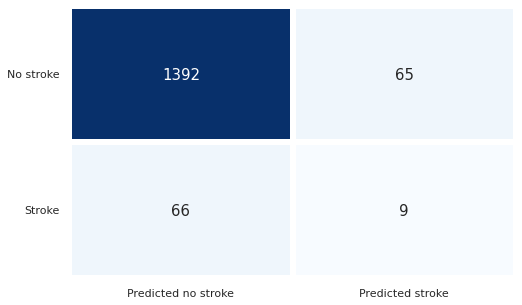

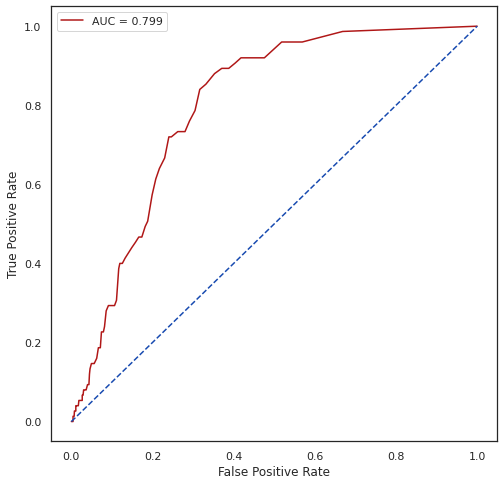

In [ ]:

# RandomForest 

#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

#Summery
Present summary of results. Declare whether you failed or succeeded to reach the objective.
Make some remarks about what it will take to move the project into production. Address things like the scalability of the model, how would you handle new data, etc...
Provide some recommendations for future work (Extensions).


#presentation.
 The presentation should be short and focused.
Slide 01 - Project name & authors.
Slide 02 - Present the problem and objective with target score.
Slide 03 - Present data (With a link to source).
Slide 04 - Present the Pre Processing process.
Slide 05 - Present the feature engineering process.
Slide 06 - Present the data for the predictor on its final state.
Slide 07 - Present methods used as predictors.
Slide 08 - Present main results and comparison of methods.
Slide 09 - Present important “Trick” or contribution to results.
Slide 10 - Present the summary and if the objective was achieved.


# this is a test

In [ ]:
! pwd

/content
